# DETEKSI WARNA PADA CITRA - OpenCV & Matplotlib

In [1]:
import cv2 ## 202331291_Rafi Indra Pramudhito Zuhayr
import numpy as np
import matplotlib.pyplot as plt

## Load gambar

In [2]:
img = cv2.imread('img.jpg') ## 202331291_Rafi Indra Pramudhito Zuhayr
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Tampilkan gambar asli dengan kontras disesuaikan

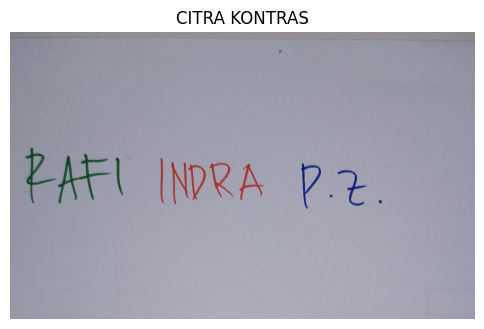

In [3]:
plt.figure(figsize=(6, 6)) ## 202331291_Rafi Indra Pramudhito Zuhayr
plt.title("CITRA KONTRAS")
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

## Fungsi deteksi warna berdasarkan HSV

In [4]:
def detect_color(img_bgr, color):
    hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
    
    if color == 'red':
        lower1 = np.array([0, 120, 70])
        upper1 = np.array([10, 255, 255])
        lower2 = np.array([170, 120, 70])
        upper2 = np.array([180, 255, 255])
        mask1 = cv2.inRange(hsv, lower1, upper1)
        mask2 = cv2.inRange(hsv, lower2, upper2)
        mask = mask1 + mask2
    elif color == 'green':
        lower = np.array([35, 25, 25])
        upper = np.array([85, 255, 255])
        mask = cv2.inRange(hsv, lower, upper)
    elif color == 'blue':
        lower = np.array([100, 150, 0])
        upper = np.array([140, 255, 255])
        mask = cv2.inRange(hsv, lower, upper)
    else:
        raise ValueError("Color harus 'red', 'green', atau 'blue'")
    
    result = cv2.bitwise_and(img_bgr, img_bgr, mask=mask)
    return cv2.cvtColor(result, cv2.COLOR_BGR2RGB), mask

## Deteksi warna

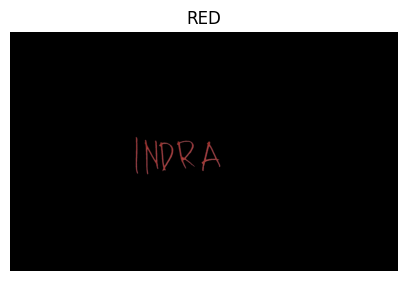

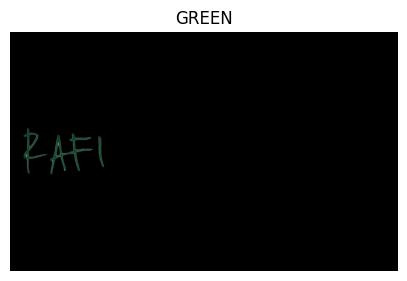

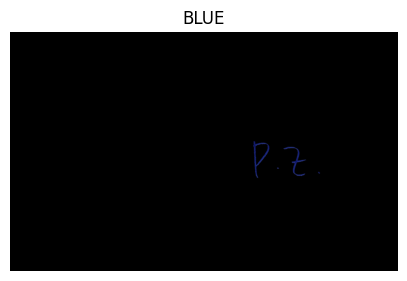

In [5]:
colors = ['red', 'green', 'blue']
for color in colors:
    result, _ = detect_color(img, color)
    plt.figure(figsize=(5, 5))
    plt.title(color.upper())
    plt.imshow(result)
    plt.axis('off')
    plt.show()

## Fungsi membuat histogram dari gambar

In [6]:
def plot_histogram(image_rgb, title='Histogram'):
    chans = cv2.split(cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))
    colors = ('b', 'g', 'r')
    plt.figure(figsize=(6, 4))
    plt.title(title)
    plt.xlabel("Intensitas")
    plt.ylabel("Jumlah Piksel")
    for chan, col in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.show()

## Histogram untuk citra asli

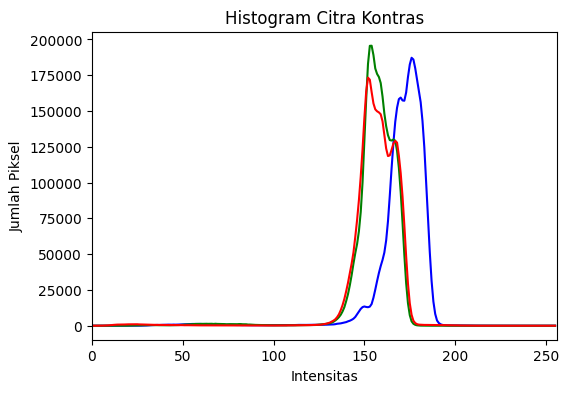

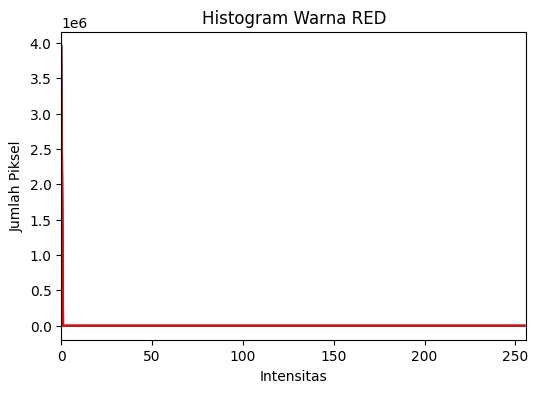

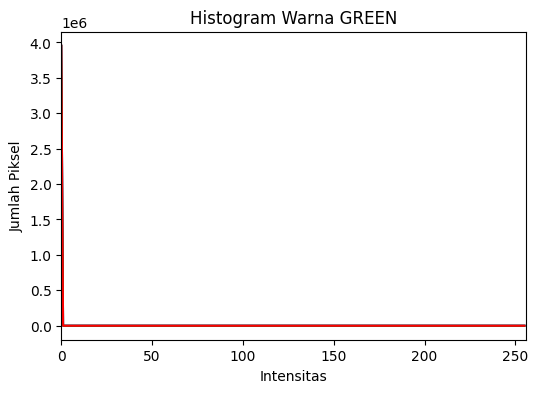

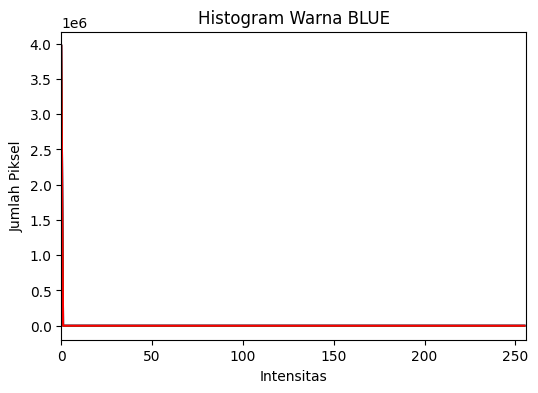

In [7]:
plot_histogram(img_rgb, "Histogram Citra Kontras")

for color in colors:
    result, _ = detect_color(img, color)
    plot_histogram(result, f"Histogram Warna {color.upper()}")


## Load Gambar Grayscale

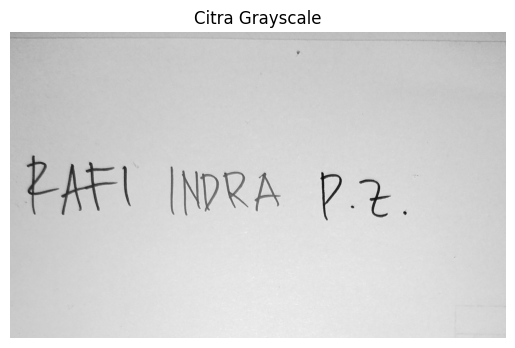

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Tampilkan citra grayscale
plt.imshow(gray, cmap='gray')
plt.title("Citra Grayscale")
plt.axis('off')
plt.show()

### Cari ambang batas otomatis (Otsu)

Ambang batas Otsu: 116.0


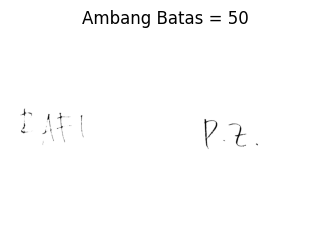

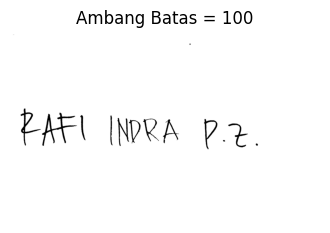

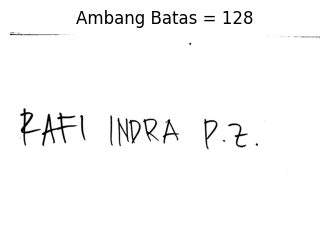

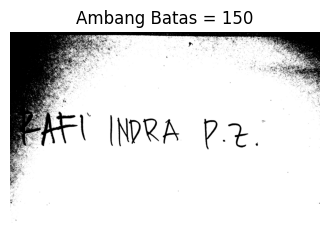

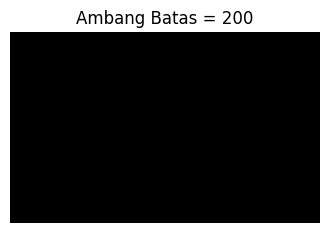

Ambang batas terurut: [50, 100, 116, 128, 150, 200]


In [9]:
th_otsu_val, th_otsu_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print("Ambang batas Otsu:", th_otsu_val)

# Uji beberapa nilai threshold manual
thresholds = [50, 100, 128, 150, 200]
results = []

for t in thresholds:
    _, bin_img = cv2.threshold(gray, t, 255, cv2.THRESH_BINARY)
    results.append((t, bin_img))

# Tampilkan hasil threshold
for t, bin_img in results:
    plt.figure(figsize=(4, 4))
    plt.title(f"Ambang Batas = {t}")
    plt.imshow(bin_img, cmap='gray')
    plt.axis('off')
    plt.show()

# Urutkan ambang batas
sorted_thresholds = sorted(thresholds + [int(th_otsu_val)])
print("Ambang batas terurut:", sorted_thresholds)


# Memperbaiki gambar Backlight

## Baca Gambar Asli

In [10]:
img2 = cv2.imread('img2.jpg')

## Konversi ke Grayscale

In [11]:
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

## Tingkatkan Kecerahan (Brightness)

In [12]:
bright = cv2.convertScaleAbs(gray, alpha=1.0, beta=40)  # beta menambah brightness

## Tingkatkan Kontras (Contrast)

In [13]:
contrast = cv2.convertScaleAbs(gray, alpha=1.5, beta=0)

## Tingkatkan Kecerahan & Kontras Bersamaan

In [14]:
bright_contrast = cv2.convertScaleAbs(gray, alpha=1.5, beta=40)

# Simpan hasil

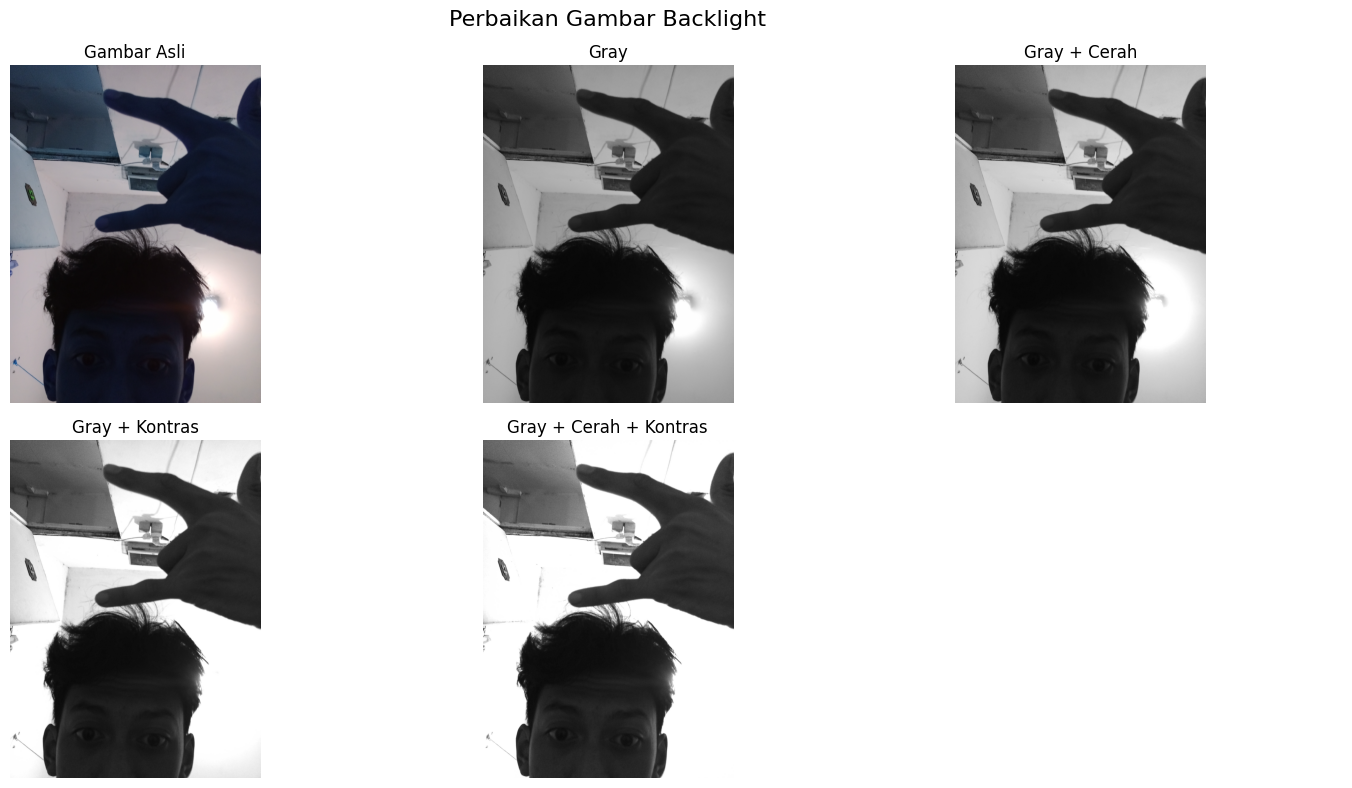

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Perbaikan Gambar Backlight', fontsize=16)

# Tampilkan gambar
axes[0, 0].imshow(img2)
axes[0, 0].set_title('Gambar Asli')
axes[0, 0].axis('off')

axes[0, 1].imshow(gray, cmap='gray')
axes[0, 1].set_title('Gray')
axes[0, 1].axis('off')

axes[0, 2].imshow(bright, cmap='gray')
axes[0, 2].set_title('Gray + Cerah')
axes[0, 2].axis('off')

axes[1, 0].imshow(contrast, cmap='gray')
axes[1, 0].set_title('Gray + Kontras')
axes[1, 0].axis('off')

axes[1, 1].imshow(bright_contrast, cmap='gray')
axes[1, 1].set_title('Gray + Cerah + Kontras')
axes[1, 1].axis('off')

axes[1, 2].axis('off')

plt.tight_layout()
plt.show()